In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [106]:
#load dataset
df=pd.read_csv("/content/recipe_data.csv")

In [107]:
df.head()

,Recipe_ID,Recipe_Name,Cuisine_Type,Ingredients_List,Preparation_Steps,Cooking_Time_Minutes,Difficulty_Level,User_ID,User_Preferences,User_Rating,User_Feedback,Date_Prepared,Season,Occasion,Serving_Size,Calories_Per_Serving,Allergen_Information,Cost_Per_Serving,Popularity_Score,Seasonal_Availability
0,R001,Beef Tacos,Mexican,"Beef, Taco Shells, Lettuce, Cheese, Tomato",Cook beef; Prepare toppings; Assemble tacos.,55,Medium,U539,NaN,3,Feedback 1,2024-07-06,Spring,Party,4,509,NaN,14.12,402,No
1,R002,Spaghetti Bolognese,Italian,"Spaghetti, Ground Beef, Tomato Sauce, Onion, G...",Boil pasta; Cook beef; Add sauce; Combine.,39,Easy,U538,NaN,2,Feedback 2,2024-02-24,Winter,Casual,4,275,Gluten,16.07,183,No
2,R003,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,36,Medium,U324,Gluten-Free,4,Feedback 3,2024-02-14,Winter,Party,5,293,NaN,11.97,137,Yes
3,R004,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,45,Medium,U548,Gluten-Free,2,Feedback 4,2024-04-13,Spring,Casual,6,580,NaN,10.36,246,Yes
4,R005,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,85,Easy,U990,Vegan,5,Feedback 5,2024-08-03,Fall,Dinner,4,641,Soy,12.68,386,No


#***Understanding data:-***

In [108]:
#shape of datset
df.shape

(5000, 20)

In [109]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recipe_ID              5000 non-null   object 
 1   Recipe_Name            5000 non-null   object 
 2   Cuisine_Type           5000 non-null   object 
 3   Ingredients_List       5000 non-null   object 
 4   Preparation_Steps      5000 non-null   object 
 5   Cooking_Time_Minutes   5000 non-null   int64  
 6   Difficulty_Level       5000 non-null   object 
 7   User_ID                5000 non-null   object 
 8   User_Preferences       2997 non-null   object 
 9   User_Rating            5000 non-null   int64  
 10  User_Feedback          5000 non-null   object 
 11  Date_Prepared          5000 non-null   object 
 12  Season                 5000 non-null   object 
 13  Occasion               5000 non-null   object 
 14  Serving_Size           5000 non-null   int64  
 15  Calo

#***Data Cleaning:-***

In [110]:
#dataset null values
df.isnull().sum()

,0
Recipe_ID,0
Recipe_Name,0
Cuisine_Type,0
Ingredients_List,0
Preparation_Steps,0
Cooking_Time_Minutes,0
Difficulty_Level,0
User_ID,0
User_Preferences,2003
User_Rating,0


In [111]:
#Treating the missing values in 'Allergen_Information' none
df['Allergen_Information']=df['Allergen_Information'].fillna('None')

In [112]:
#Treating the missing values in 'Allergen_Information' none
df['User_Preferences']=df['User_Preferences'].fillna('None')

In [113]:
#check the duplicated rows
df.duplicated().sum()

0

In [114]:
#drop unncessary column
df.drop(columns=['User_ID','Recipe_ID','User_Rating','User_Feedback','Date_Prepared','Serving_Size','Cost_Per_Serving','Calories_Per_Serving','Popularity_Score'],inplace=True)

In [127]:
#categorical column list
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Recipe_Name', 'Cuisine_Type', 'Ingredients_List', 'Preparation_Steps',
       'Difficulty_Level', 'User_Preferences', 'Season', 'Occasion',
       'Allergen_Information', 'Seasonal_Availability'],
      dtype='object')

In [131]:
# Print unique values for each categorical column
for col in cate_col:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 50)

Unique values in column 'Recipe_Name':
['Beef Tacos' 'Spaghetti Bolognese' 'Chicken Curry' 'Vegetable Stir Fry'
 'Margherita Pizza']
--------------------------------------------------
Unique values in column 'Cuisine_Type':
['Mexican' 'Italian' 'Indian' 'Chinese']
--------------------------------------------------
Unique values in column 'Ingredients_List':
['Beef, Taco Shells, Lettuce, Cheese, Tomato'
 'Spaghetti, Ground Beef, Tomato Sauce, Onion, Garlic'
 'Chicken, Curry Powder, Coconut Milk, Onion, Garlic'
 'Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic'
 'Pizza Dough, Tomato Sauce, Mozzarella, Basil, Olive Oil']
--------------------------------------------------
Unique values in column 'Preparation_Steps':
['Cook beef; Prepare toppings; Assemble tacos.'
 'Boil pasta; Cook beef; Add sauce; Combine.'
 'Cook chicken; Add spices; Pour coconut milk; Simmer.'
 'Chop veggies; Stir-fry; Add sauce; Serve.'
 'Prepare dough; Add toppings; Bake pizza.']
-------------------------------------

In [115]:
df.shape

(5000, 11)

#***Data Visualization:-***

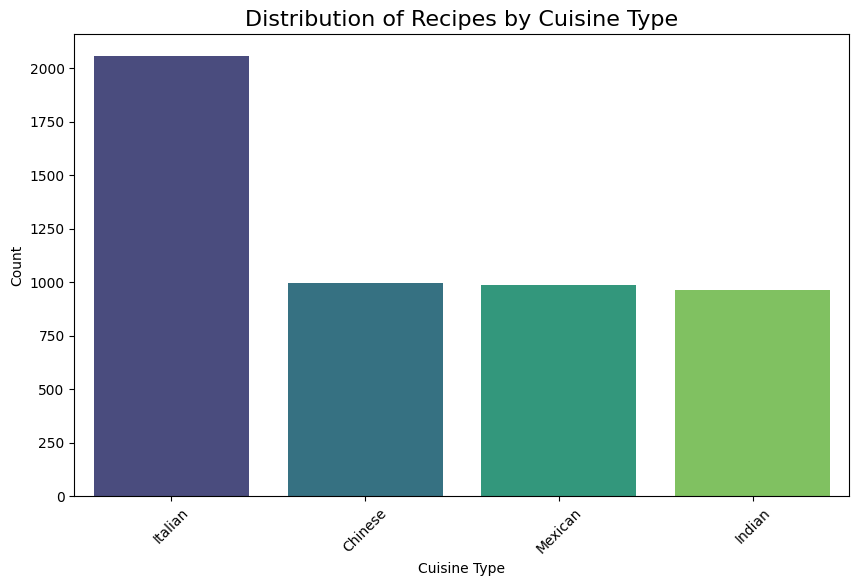

In [119]:
# Count plot for Cuisine_Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cuisine_Type', order=df['Cuisine_Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Recipes by Cuisine Type', fontsize=16)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

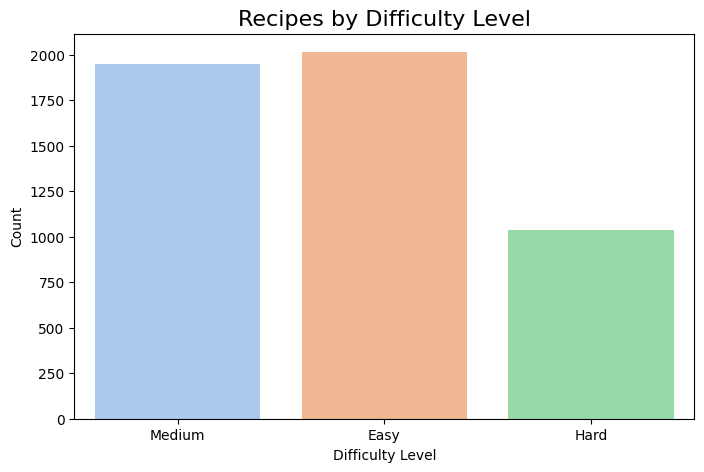

In [120]:
# Count plot for Difficulty_Level
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Difficulty_Level', palette='pastel')
plt.title('Recipes by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.show()

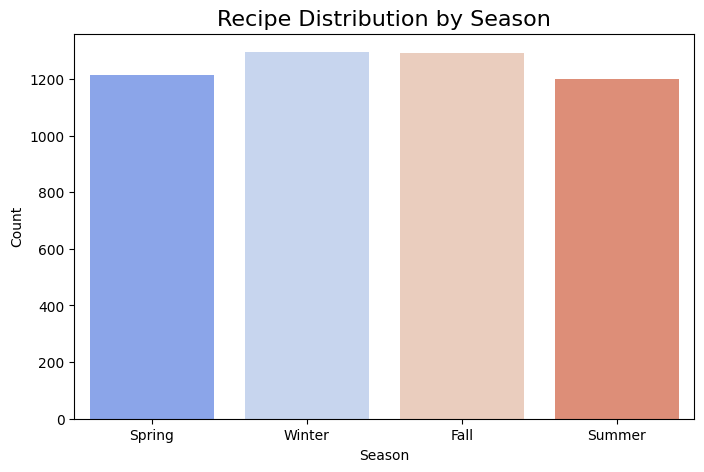

In [122]:
# Count plot for Season
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Season', palette='coolwarm')
plt.title('Recipe Distribution by Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


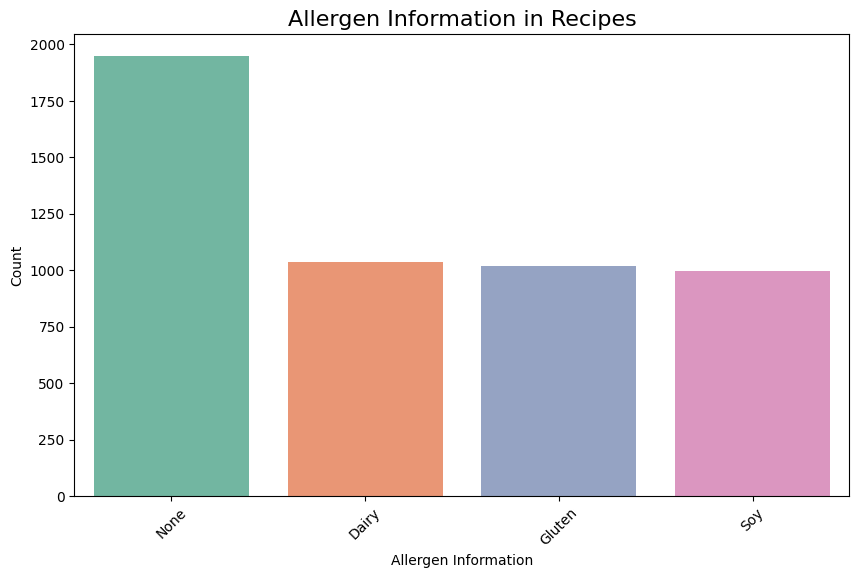

In [123]:
# Count plot for Allergen_Information
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Allergen_Information', order=df['Allergen_Information'].value_counts().index, palette='Set2')
plt.title('Allergen Information in Recipes', fontsize=16)
plt.xlabel('Allergen Information')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


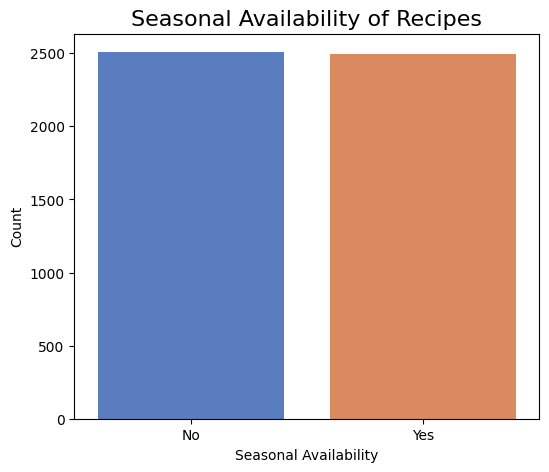

In [124]:
# Count plot for Seasonal_Availability
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Seasonal_Availability', palette='muted')
plt.title('Seasonal Availability of Recipes', fontsize=16)
plt.xlabel('Seasonal Availability')
plt.ylabel('Count')
plt.show()


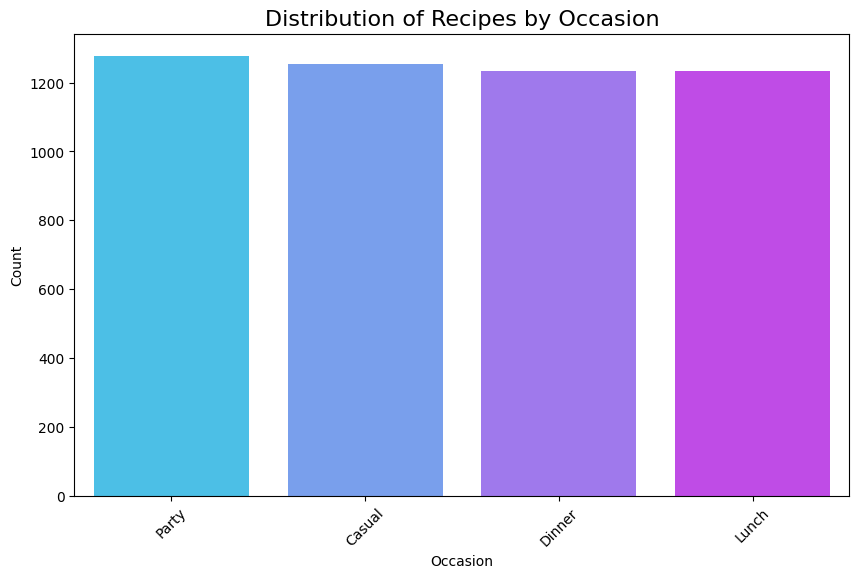

In [125]:
# Count plot for Occasion
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occasion', order=df['Occasion'].value_counts().index, palette='cool')
plt.title('Distribution of Recipes by Occasion', fontsize=16)
plt.xlabel('Occasion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


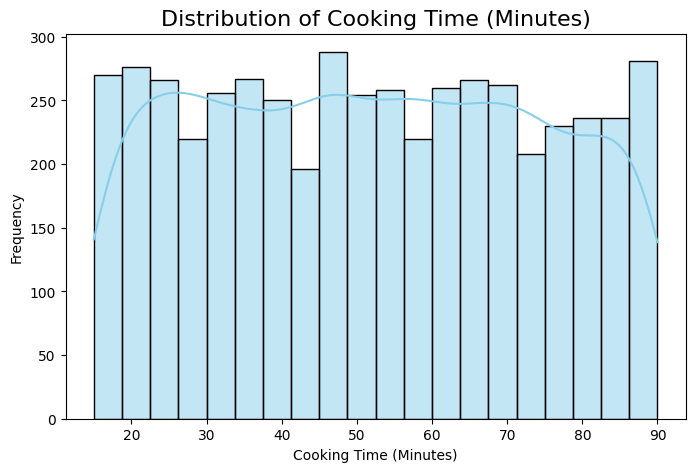

In [121]:
# Histogram for Cooking_Time_Minutes
plt.figure(figsize=(8, 5))
sns.histplot(df['Cooking_Time_Minutes'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Cooking Time (Minutes)', fontsize=16)
plt.xlabel('Cooking Time (Minutes)')
plt.ylabel('Frequency')
plt.show()


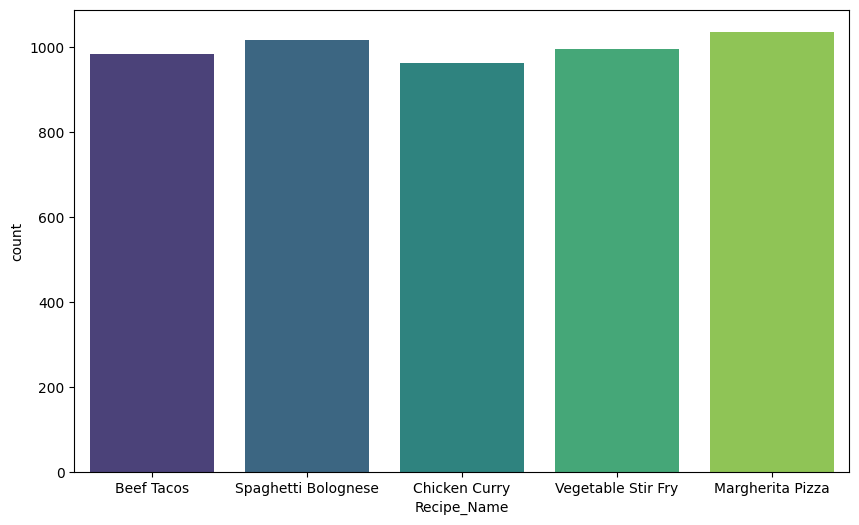

In [138]:
#bar chart recipe neame
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Recipe_Name', palette='viridis')
plt.show()

In [133]:
#drop Cooking_Time_Minutes column not necssary
df.drop(columns=['Cooking_Time_Minutes'],inplace=True)

In [134]:
df

,Recipe_Name,Cuisine_Type,Ingredients_List,Preparation_Steps,Difficulty_Level,User_Preferences,Season,Occasion,Allergen_Information,Seasonal_Availability
0,Beef Tacos,Mexican,"Beef, Taco Shells, Lettuce, Cheese, Tomato",Cook beef; Prepare toppings; Assemble tacos.,Medium,None,Spring,Party,None,No
1,Spaghetti Bolognese,Italian,"Spaghetti, Ground Beef, Tomato Sauce, Onion, G...",Boil pasta; Cook beef; Add sauce; Combine.,Easy,None,Winter,Casual,Gluten,No
2,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,Medium,Gluten-Free,Winter,Party,None,Yes
3,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,Medium,Gluten-Free,Spring,Casual,None,Yes
4,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,Easy,Vegan,Fall,Dinner,Soy,No
...,...,...,...,...,...,...,...,...,...,...
4995,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,Easy,Vegan,Summer,Casual,Soy,No
4996,Chicken Curry,Indian,"Chicken, Curry Powder, Coconut Milk, Onion, Ga...",Cook chicken; Add spices; Pour coconut milk; S...,Medium,Gluten-Free,Winter,Casual,None,No
4997,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,Easy,Vegan,Winter,Party,Soy,Yes
4998,Vegetable Stir Fry,Chinese,"Broccoli, Carrot, Bell Pepper, Soy Sauce, Garlic",Chop veggies; Stir-fry; Add sauce; Serve.,Easy,Vegan,Spring,Dinner,Soy,No


#***Save The CSV:-***

In [136]:
#save csv
df.to_csv('Recipe_recommend_cleaned.csv',index=False)